# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [80]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&units=" + units + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        timestamp = city_weather["dt"]
        time_obj = time.gmtime(timestamp)
        city_date = time.strftime("%m/%d/%Y", time_obj)

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kalulushi
Processing Record 2 of Set 1 | dudinka
Processing Record 3 of Set 1 | nadym
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | kangding
Processing Record 6 of Set 1 | vega de alatorre
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | bredasdorp
Processing Record 9 of Set 1 | campoverde
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | duck lake
Processing Record 12 of Set 1 | taiohae
City not found. Skipping...
Processing Record 13 of Set 1 | christchurch
Processing Record 14 of Set 1 | puerto aysen
Processing Record 15 of Set 1 | bethel
Processing Record 16 of Set 1 | pocatello
Processing Record 17 of Set 1 | crane
Processing Record 18 of Set 1 | hasaki
Processing Record 19 of Set 1 | cable beach
City not found. Skipping...
Processing Record 20 of Set 1 | bubaque
Processing Record 21 of Set 1 | pollenca
Processing

In [81]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [82]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kalulushi,-12.8378,28.0919,15.14,52,18,2.18,ZM,07/03/2024
1,dudinka,69.4058,86.1778,13.25,54,100,7.12,RU,07/03/2024
2,nadym,65.5333,72.5167,12.99,90,79,4.60,RU,07/03/2024
3,adamstown,-25.0660,-130.1015,20.72,64,100,5.13,PN,07/03/2024
4,kangding,30.0513,101.9603,17.04,98,100,0.19,CN,07/03/2024


In [83]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [85]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kalulushi,-12.8378,28.0919,15.14,52,18,2.18,ZM,07/03/2024
1,dudinka,69.4058,86.1778,13.25,54,100,7.12,RU,07/03/2024
2,nadym,65.5333,72.5167,12.99,90,79,4.60,RU,07/03/2024
3,adamstown,-25.0660,-130.1015,20.72,64,100,5.13,PN,07/03/2024
4,kangding,30.0513,101.9603,17.04,98,100,0.19,CN,07/03/2024


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

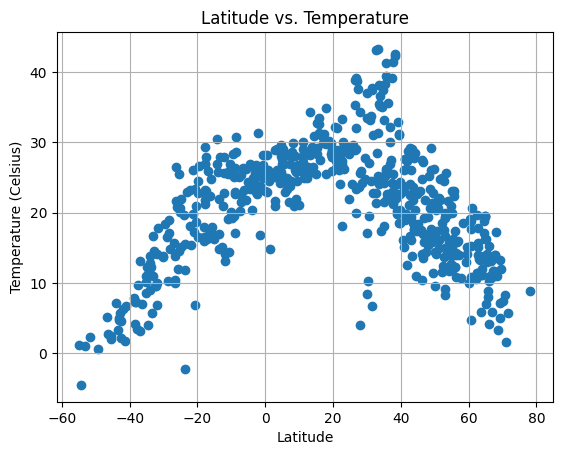

In [86]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Temperature")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

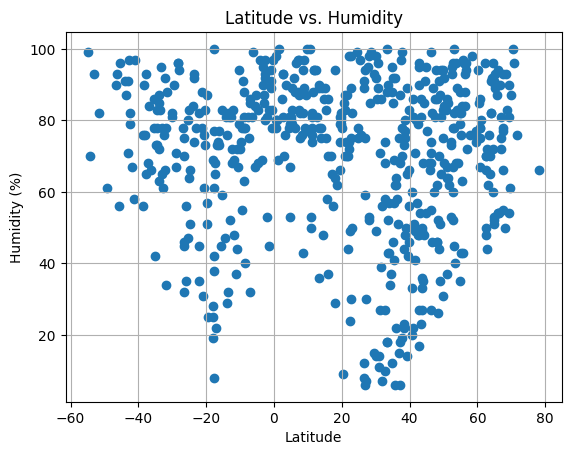

In [87]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

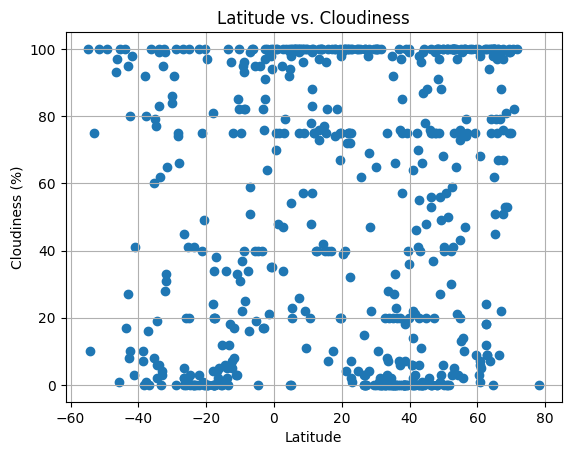

In [88]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

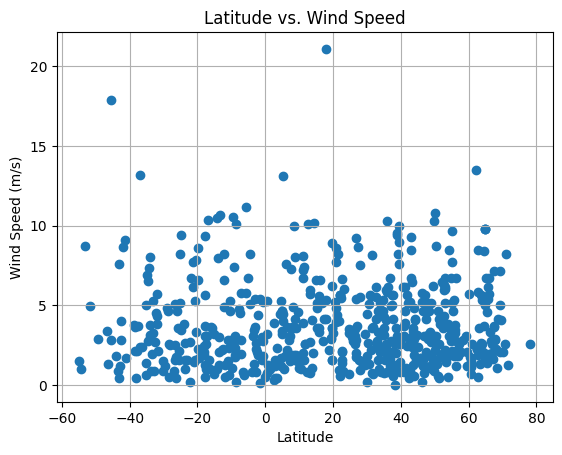

In [89]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [90]:
# Define a function to create Linear Regression plots
def regress(x_values, y_values):
    # Perform a linear regression on temperature vs. latitude
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept
    print(regress_values)
regress(city_data_df["Lat"], city_data_df["Max Temp"])
regress(city_data_df["Lat"], city_data_df["Humidity"])
regress(city_data_df["Lat"], city_data_df["Cloudiness"])
regress(city_data_df["Lat"], city_data_df["Wind Speed"])

City_ID
0      20.129617
1      22.028439
2      21.939032
3      19.847295
4      21.119831
         ...    
570    19.875024
571    21.666539
572    20.617257
573    20.142496
574    21.036069
Name: Lat, Length: 575, dtype: float64
City_ID
0      71.412095
1      67.539578
2      67.721919
3      71.987871
4      69.392622
         ...    
570    71.931321
571    68.277650
572    70.417588
573    71.385830
574    69.563449
Name: Lat, Length: 575, dtype: float64
City_ID
0      48.487629
1      56.526884
2      56.148350
3      47.292331
4      52.680009
         ...    
570    47.409728
571    54.994663
572    50.552202
573    48.542153
574    52.325374
Name: Lat, Length: 575, dtype: float64
City_ID
0      3.722145
1      3.739332
2      3.738523
3      3.719590
4      3.731108
         ...   
570    3.719841
571    3.736056
572    3.726559
573    3.722262
574    3.730350
Name: Lat, Length: 575, dtype: float64


In [91]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,dudinka,69.4058,86.1778,13.25,54,100,7.12,RU,07/03/2024
2,nadym,65.5333,72.5167,12.99,90,79,4.60,RU,07/03/2024
4,kangding,30.0513,101.9603,17.04,98,100,0.19,CN,07/03/2024
5,vega de alatorre,20.0333,-96.6333,28.09,78,99,3.27,MX,07/03/2024
10,duck lake,52.8168,-106.2344,24.50,52,41,4.35,CA,07/03/2024


In [92]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kalulushi,-12.8378,28.0919,15.14,52,18,2.18,ZM,07/03/2024
3,adamstown,-25.0660,-130.1015,20.72,64,100,5.13,PN,07/03/2024
6,port-aux-francais,-49.3500,70.2167,0.56,61,100,2.90,TF,07/03/2024
7,bredasdorp,-34.5322,20.0403,11.22,83,2,6.55,ZA,07/03/2024
8,campoverde,-8.4753,-74.8058,30.83,40,25,0.20,PE,07/03/2024


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.4096770413737497


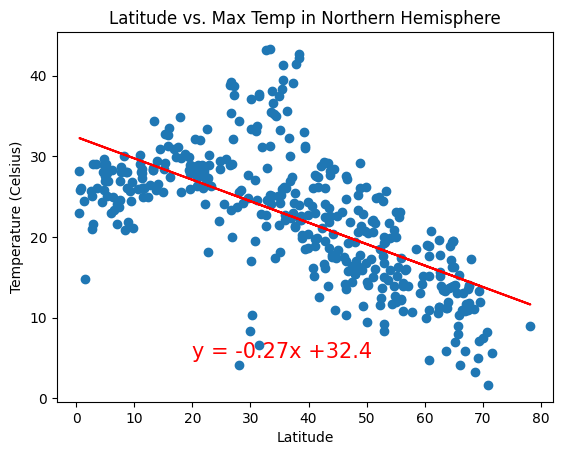

In [93]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build scatter plot for latitude vs. temperature
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], marker="o")
plt.plot(x_values,regress_values,"r-")

# Incorporate the other graph properties
plt.title("Latitude vs. Max Temp in Northern Hemisphere")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.annotate(line_eq,(20,5),fontsize=15,color="red")
plt.grid(False)

# Save the figure
plt.savefig("output_data/Fig5.png")

# Show plot
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.7041790279754606


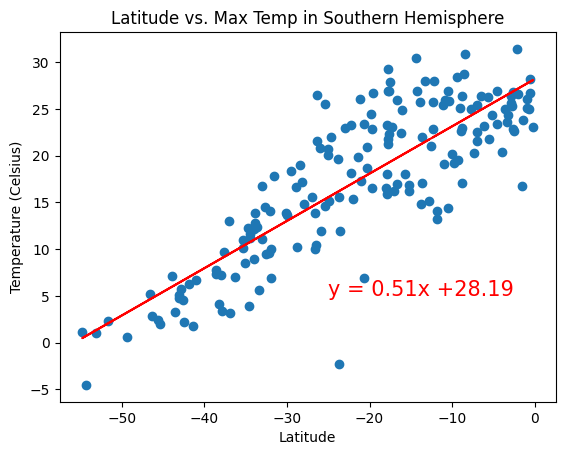

In [94]:
# Linear regression on Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build scatter plot for latitude vs. temperature
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], marker="o")
plt.plot(x_values,regress_values,"r-")

# Incorporate the other graph properties
plt.title("Latitude vs. Max Temp in Southern Hemisphere")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.annotate(line_eq,(-25,5),fontsize=15,color="red")
plt.grid(False)

# Save the figure
plt.savefig("output_data/Fig6.png")

# Show plot
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** Maximum temperature appears to correlate strongly with latitude in both hemispheres. As latitude approaches 0 (the equator), temperatures trend higher. From this data, we can infer that temperatures are higher along the equator than at the poles.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0015253652569260454


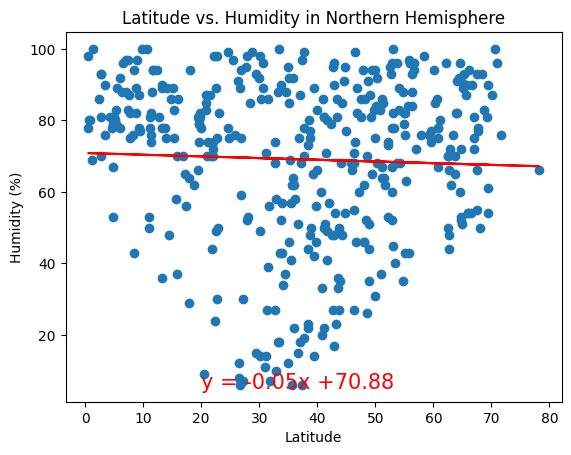

In [95]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build scatter plot for latitude vs. temperature
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], marker="o")
plt.plot(x_values,regress_values,"r-")

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity in Northern Hemisphere")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.annotate(line_eq,(20,5),fontsize=15,color="red")
plt.grid(False)

# Save the figure
plt.savefig("output_data/Fig7.png")

# Show plot
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.003987742632875928


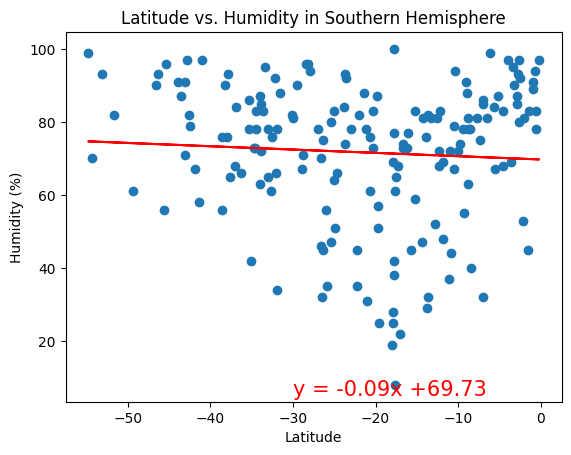

In [96]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build scatter plot for latitude vs. temperature
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], marker="o")
plt.plot(x_values,regress_values,"r-")

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity in Southern Hemisphere")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.annotate(line_eq,(-30,5),fontsize=15,color="red")
plt.grid(False)

# Save the figure
plt.savefig("output_data/Fig8.png")

# Show plot
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** There doesn't appear to be much of a relationship between latitude and humidity. The r-squared values are quite low. This shows us that distance from the equator is not a good indicator of humidity levels.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.004574768332019317


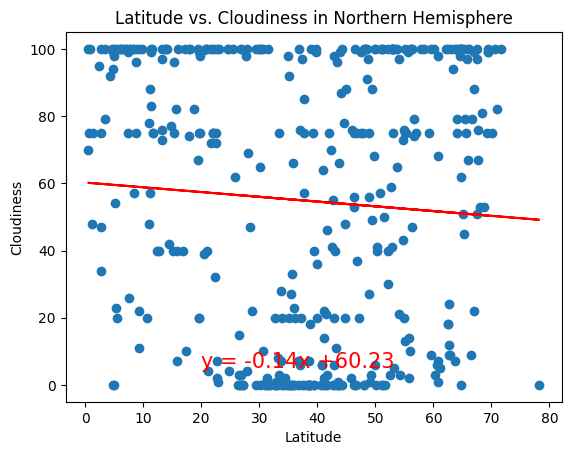

In [97]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build scatter plot for latitude vs. temperature
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], marker="o")
plt.plot(x_values,regress_values,"r-")

# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness in Northern Hemisphere")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.annotate(line_eq,(20,5),fontsize=15,color="red")
plt.grid(False)

# Save the figure
plt.savefig("output_data/Fig9.png")

# Show plot
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.0007512294297564273


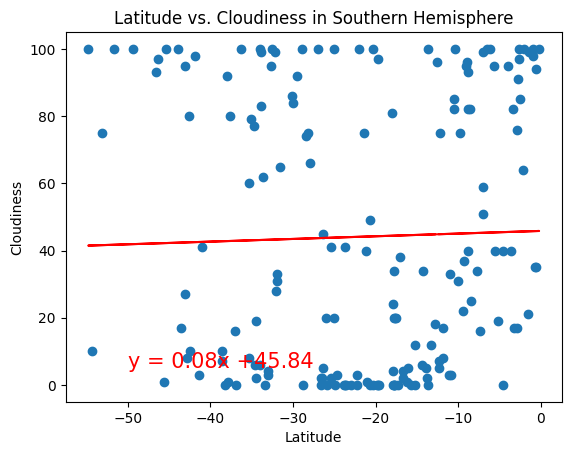

In [98]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build scatter plot for latitude vs. temperature
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], marker="o")
plt.plot(x_values,regress_values,"r-")

# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness in Southern Hemisphere")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.annotate(line_eq,(-50,5),fontsize=15,color="red")
plt.grid(False)

# Save the figure
plt.savefig("output_data/Fig10.png")

# Show plot
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** Again, the r-squared values are very low. Distance from the equator doesn't appear to impact cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 2.514023592004628e-05


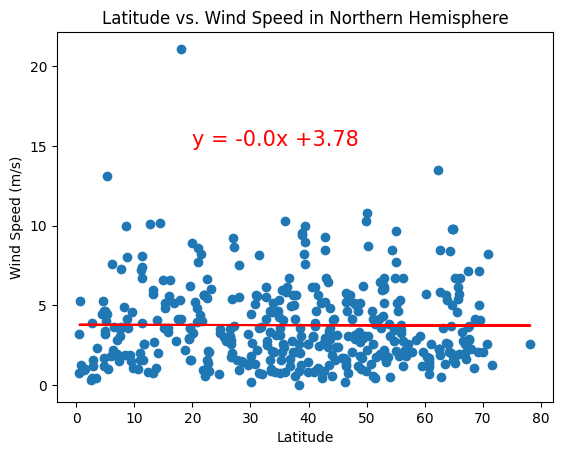

In [99]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build scatter plot for latitude vs. temperature
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], marker="o")
plt.plot(x_values,regress_values,"r-")

# Incorporate the other graph properties
plt.title("Latitude vs. Wind Speed in Northern Hemisphere")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.grid(False)

# Save the figure
plt.savefig("output_data/Fig11.png")

# Show plot
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.0027083352787276296


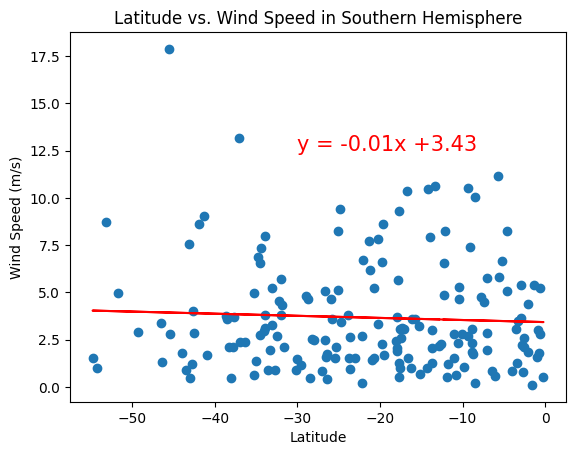

In [100]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build scatter plot for latitude vs. temperature
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], marker="o")
plt.plot(x_values,regress_values,"r-")

# Incorporate the other graph properties
plt.title("Latitude vs. Wind Speed in Southern Hemisphere")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.annotate(line_eq,(-30,12.5),fontsize=15,color="red")
plt.grid(False)

# Save the figure
plt.savefig("output_data/Fig11.png")

# Show plot
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** The r-squared values for this relationship are quite low as well. This shows us that, outside of temperature, none of the other weather trends we have chosen correlate closely with latitude. Wind speed, cloudiness and humidity do not change as we approach the equator, but temperature rises.

'07/03/2024'